In [ ]:
warehouse = [[1,1,0,1],[1,1,1,1] ]
len(warehouse)

2

In [ ]:
import pandas as pd

data1 = pd.read_csv('Datos.txt', header = None)
print(data1)


                                         0
0     0.        0.        0.        0.    
1    35.8284    0.      -29.2314    0.    
2    95.3362    0.      -91.1457    0.    
3   155.0938    0.     -151.6907    0.    
4    214.989    0.     -210.2951    0.    
5   274.8244    0.     -266.1124    0.    
6   320.1086    0.     -364.9766    0.    
7   286.4778    0.     -277.3659    0.    
8   221.0992    0.     -214.5882    0.    
9   158.4492    0.     -153.3675    0.    
10   97.5707    0.      -95.3845    0.    
11   37.9462    0.      -32.9161    0.    
12    0.        0.        0.        0.    


In [ ]:
data1[0][0]

'0.        0.        0.        0.    '

In [ ]:
import numpy as np

data = np.genfromtxt('Datos.txt', skip_header=True)

OSError: ignored

In [ ]:
n_cols = 4
import numpy as np 
theta = input("Escribe los " + str(n_cols) +" angulos en radianes separados por comas (ej: 3, 3.5, 4.6): ")
theta = [float(value) for value in theta.split(', ')]
theta = [value*np.pi/180 for value in theta]
print(theta)

Escribe los 4 angulos en radianes separados por comas (ej: 3, 3.5, 4.6): 180, 360, 0, 45
[3.141592653589793, 6.283185307179586, 0.0, 0.7853981633974483]


In [ ]:
  posiciones = input("Escribe los " + str(n_secs) +" valores de las distancias a las que está cada sección de sensores del origen separados por comas (ej: 3, 3.5, 4.6...etc): ")
  posiciones = [float(value) for value in posiciones.split(',')] 
  erre = input("Escribe los " + str(n_cols) +" valores de las distancias a las que está cada sensor del eje neutro, separados por comas (ej: 3, 3.5, 4.6...etc): ")
  erre = [float(value) for value in erre.split(',')]

  theta = input("Escribe los " + str(n_secs) +" valores de las angulos (en grados) que forman cada sensor con el eje neutro, separados por comas (ej: 3, 3.5, 4.6...etc): ")
  theta = [float(value) for value in theta.split(',')]
  theta = [value*np.pi/180 for value in theta]
  N = input("Escribe cuantos números quieres interpolar ej N = 1000")
  N = [float(value) for value in N.split(',')]
  L = input("Escribe la longitud total de la barra L = 3.45 m ")
  L = [float(value) for value in L.split(',')]

In [ ]:
def CurvaturayA(strains,posiciones, erre, angulos, N,L, fijo):
  import numpy as np 
  e_1 , e_2, e_3, e_4 = [],[],[],[]
  for i in range(0, len(strains[0:])):
    e_1.append(strains[i][0]) , e_2.append(strains[i][1]) , e_3.append(strains[i][2]), e_4.append(strains[i][3])
  
  if fijo==1: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    posiciones = np.append(0,np.array(posiciones))
  elif fijo==2: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(np.array(posiciones), L)
  elif fijo==12: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(0,np.array(posiciones))
    posiciones = np.append(np.array(posiciones), L)

  x = np.linspace(posiciones[0],posiciones[-1] ,N)



  
  import matplotlib.pyplot as plt 
  fig = plt.figure(figsize= (12,12))
  ax = fig.add_subplot( )
  ax.plot(x, e_1p, color = "r" ,label = "e_1", alpha = 0.4)
  ax.scatter(posiciones, e_1)
  ax.scatter(posiciones, e_2)
  ax.scatter(posiciones, e_3)
  ax.scatter(posiciones, e_4)

  ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
  ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
  ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
  ax.set_title("Interpolated Strains ")
  plt.show()

  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
  r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
  for i in range(0, len(e_1p)): 
    k_1 , k_2, k_3, k_4 = np.array([ -e_1p[i]/r1*np.cos(theta_1), - e_1p[i]/r1*np.sin(theta_1) ]) , np.array([-e_2p[i]/r2*np.cos(theta_2),  - e_2p[i]/r2*np.sin(theta_2)]), np.array([-e_3p[i]/r3*np.cos(theta_3),  - e_3p[i]/r3*np.sin(theta_3)]), np.array( [-e_4p[i]/r4*np.cos(theta_4),  - e_4p[i]/r4*np.sin(theta_4)])  
    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   

    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      continue

    else: 
      ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      theta = np.arccos(  (k_app@np.array([1,0])) /  (np.linalg.norm(k_app)) )
      vector_kapp.append(k_app)
      vector_k.append(k)
      vector_theta.append(theta)  
 
  torsion = []
  for i in range(0,len(vector_theta)-1): 
    torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 


  return vector_k[1:], vector_theta[1:], vector_kapp[1:], torsion

In [ ]:
def CurvaturayA(strains,posiciones, erre, angulos, N,L, fijo):
  import numpy as np 
  e_1 , e_2, e_3, e_4 = [],[],[],[]
  num1 = len(strains[0:])
  for i in range(0, num1):
    e_1.append(strains[i][0]) , e_2.append(strains[i][1]) , e_3.append(strains[i][2]), e_4.append(strains[i][3])
  
  if fijo==1: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    posiciones = np.append(0,np.array(posiciones))
  elif fijo==2: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(np.array(posiciones), L)
  elif fijo==12: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(0,np.array(posiciones))
    posiciones = np.append(np.array(posiciones), L)

  from scipy import interpolate
  interp_strains1 = interpolate.interp1d(posiciones, e_1, kind='cubic')
  interp_strains2 = interpolate.interp1d(posiciones, e_2, kind='cubic')
  interp_strains3 = interpolate.interp1d(posiciones, e_3, kind='cubic')
  interp_strains4 = interpolate.interp1d(posiciones, e_4, kind='cubic')

  x = np.linspace(posiciones[0],posiciones[-1] ,N)


  n = L/12
  n2 = int(N/12)
  desp = n/2

  e_1p, e_2p, e_3p, e_4p = interp_strains1(x), interp_strains2(x), interp_strains3(x) , interp_strains4(x)
  # if any(np.array(e_1p)==0):
  #   e_1p = np.delete(e_1p, e_1p==0)

  e1p , e2p , e3p, e4p = [],[],[],[]
  e1p , e2p , e3p, e4p = np.array(e1p),np.array(e2p),np.array(e3p),np.array(e4p)
  for i in range(0,12):
    pos = desp + n*i
   
    rell1 = np.full(n2, interp_strains1(pos))
    rell2 = np.full(n2, interp_strains2(pos))
    rell3 = np.full(n2, interp_strains3(pos))
    rell4 = np.full(n2, interp_strains4(pos))
    # print(pos, interp_strains1(pos))
    e1p = np.append(e1p, rell1)
    e2p = np.append(e2p, rell2)
    e3p = np.append(e3p, rell3)
    e4p = np.append(e4p, rell4)

    # print(e1p)


  x2 = np.linspace(posiciones[0],posiciones[-1] ,len(e1p))

  import matplotlib.pyplot as plt 
  fig = plt.figure(figsize= (12,12))
  ax = fig.add_subplot( )
  ax.plot(x, e_1p, color = "r" ,label = "e_1", alpha = 0.4)
  ax.scatter(posiciones, e_1)
  ax.scatter(posiciones, e_2)
  ax.scatter(posiciones, e_3)
  ax.scatter(posiciones, e_4)

  ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
  ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
  ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
  ax.scatter(x2, e1p, color = "r" ,label = "e1p", alpha = 0.4)
  ax.scatter(x2, e2p, color = "r" ,label = "e2p", alpha = 0.4)
  ax.scatter(x2, e3p, color = "r" ,label = "e3p", alpha = 0.4)
  ax.scatter(x2, e4p, color = "r" ,label = "e4p", alpha = 0.4)

  ax.set_title("Interpolated Strains ")
  plt.show()

  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
  r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
  print(len(e1p))
  print(e1p)
  for i in range(0, len(e1p)): 
    k_1 , k_2, k_3, k_4 = np.array([ -e1p[i]/r1*np.cos(theta_1), - e1p[i]/r1*np.sin(theta_1) ]) , np.array([-e2p[i]/r2*np.cos(theta_2),  - e2p[i]/r2*np.sin(theta_2)]), np.array([-e3p[i]/r3*np.cos(theta_3),  - e3p[i]/r3*np.sin(theta_3)]), np.array( [-e4p[i]/r4*np.cos(theta_4),  - e4p[i]/r4*np.sin(theta_4)])  
    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   

    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      continue

    else: 
      ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      theta = np.arccos(  (k_app@np.array([1,0])) /  (np.linalg.norm(k_app)) )
      vector_kapp.append(k_app)
      vector_k.append(k)
      vector_theta.append(theta)  
 
  torsion = []
  for i in range(0,len(vector_theta)-1): 
    torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 


  return vector_k[1:], vector_theta[1:], vector_kapp[1:], torsion, e1p, e2p, e3p, e4p

In [ ]:
def CurvaturayA(strains,posiciones, erre, angulos, N,L, fijo):
  import numpy as np 
  e_1 , e_2, e_3, e_4 = [],[],[],[]
  for i in range(0, len(strains[0:])):
    e_1.append(strains[i][0]) , e_2.append(strains[i][1]) , e_3.append(strains[i][2]), e_4.append(strains[i][3])
  
  if fijo==1: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    posiciones = np.append(0,np.array(posiciones))
  elif fijo==2: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(np.array(posiciones), L)
  elif fijo==12: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(0,np.array(posiciones))
    posiciones = np.append(np.array(posiciones), L)

  from scipy import interpolate
  interp_strains1 = interpolate.interp1d(posiciones, e_1, kind='cubic')
  interp_strains2 = interpolate.interp1d(posiciones, e_2, kind='cubic')
  interp_strains3 = interpolate.interp1d(posiciones, e_3, kind='cubic')
  interp_strains4 = interpolate.interp1d(posiciones, e_4, kind='cubic')

  x = np.linspace(posiciones[0],posiciones[-1] ,N)

  e_1p, e_2p, e_3p, e_4p = interp_strains1(x), interp_strains2(x), interp_strains3(x) , interp_strains4(x)
  # if any(np.array(e_1p)==0):
  #   e_1p = np.delete(e_1p, e_1p==0)
  
  import matplotlib.pyplot as plt 
  fig = plt.figure(figsize= (12,12))
  ax = fig.add_subplot( )
  ax.plot(x, e_1p, color = "r" ,label = "e_1", alpha = 0.4)
  ax.scatter(posiciones, e_1)
  ax.scatter(posiciones, e_2)
  ax.scatter(posiciones, e_3)
  ax.scatter(posiciones, e_4)

  ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
  ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
  ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
  ax.set_title("Interpolated Strains ")
  plt.show()

  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
  r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
  for i in range(0, len(e_1p)): 
    k_1 , k_2, k_3, k_4 = np.array([ -e_1p[i]/r1*np.cos(theta_1), - e_1p[i]/r1*np.sin(theta_1) ]) , np.array([-e_2p[i]/r2*np.cos(theta_2),  - e_2p[i]/r2*np.sin(theta_2)]), np.array([-e_3p[i]/r3*np.cos(theta_3),  - e_3p[i]/r3*np.sin(theta_3)]), np.array( [-e_4p[i]/r4*np.cos(theta_4),  - e_4p[i]/r4*np.sin(theta_4)])  
    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   

    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      continue

    else: 
      ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      theta = np.arccos(  (k_app@np.array([1,0])) /  (np.linalg.norm(k_app)) )
      vector_kapp.append(k_app)
      vector_k.append(k)
      vector_theta.append(theta)  
 
  torsion = []
  for i in range(0,len(vector_theta)-1): 
    torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 


  return vector_k[1:], vector_theta[1:], vector_kapp[1:], torsion

In [ ]:
def CyA(strains,posiciones,erre,angulos,N,L):
  import matplotlib.pyplot as plt 
  # Matriz con columnas para cada sensor, es decir, cada fila es una sección 
  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  for i in range(0, len(strains[0:])): 
    e_1 , e_2, e_3, e_4  = strains[i][0] , strains[i][1] , strains[i][2], strains[i][3]
    theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
    r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
    k_1 , k_2, k_3, k_4 = np.array([  -e_1/r1*np.cos(theta_1),  - e_1/r1*np.sin(theta_1)  ]) , np.array([-e_2/r2*np.cos(theta_2),  - e_2/r2*np.sin(theta_2)]), np.array([-e_3/r3*np.cos(theta_3),  - e_3/r3*np.sin(theta_3)]), np.array( [-e_4/r4*np.cos(theta_4),  - e_4/r4*np.sin(theta_4)])  

    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   
    if k_app.all() == 0: 
      theta = 0 
    else: 
      theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
    vector_kapp.append(k_app)
    vector_k.append(k)
    vector_theta.append(theta)
  
  from scipy import interpolate
  interpolacion_k = interpolate.interp1d(posiciones, vector_k, kind='cubic')
  #ikapp = interpolate.interp1d(posiciones, vector_kapp , kind='linear')
  xprima = np.linspace(0,L,N)

  curvatura = interpolacion_k(xprima)
  #vector_ks = ikapp(xprima)
  torsion2 = []
  interpolacion_theta = interpolate.interp1d(posiciones, vector_theta, kind='linear')
  #torsion1 = interpolacion_theta.__call__(xprima, 1)
  angulos = interpolacion_theta(xprima)
  for i in range(0,len(angulos)-1): 
    torsion2.append( (angulos[i+1]-angulos[i])/(len(angulos)-1) )
  
  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 8))
  ax[0].plot(posiciones, vector_k, 'o', label='Datos curvatura')
  ax[0].plot(xprima, interpolacion_k(xprima), label="Interpolación Cúbica")
  ax[0].legend(loc='lower left', ncol=2)
  ax[0].set_title("Curvatura")

  ax[1].plot(posiciones, vector_theta, 'o', label='Datos ángulos')
  ax[1].plot(xprima, interpolacion_theta(xprima), label="Interpolación Cúbica")
  ax[1].legend(loc='lower left', ncol=2)
  ax[1].set_title("Ángulos")

  return  curvatura, angulos,  torsion2, #torsion1, vector_ks,

In [ ]:
def CyA(strains,posiciones,erre,angulos,N,L):
  import matplotlib.pyplot as plt 
  # Matriz con columnas para cada sensor, es decir, cada fila es una sección 
  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  for i in range(0, len(strains[0:])): 
    e_1 , e_2, e_3, e_4  = strains[i][0] , strains[i][1] , strains[i][2], strains[i][3]
    theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
    r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
    k_1 , k_2, k_3, k_4 = np.array([  -e_1/r1*np.cos(theta_1),  - e_1/r1*np.sin(theta_1)  ]) , np.array([-e_2/r2*np.cos(theta_2),  - e_2/r2*np.sin(theta_2)]), np.array([-e_3/r3*np.cos(theta_3),  - e_3/r3*np.sin(theta_3)]), np.array( [-e_4/r4*np.cos(theta_4),  - e_4/r4*np.sin(theta_4)])  

    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   
    if k_app.all() == 0: 
      theta = 0 
    else: 
      theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
    vector_kapp.append(k_app)
    vector_k.append(k)
    vector_theta.append(theta)
  
  from scipy import interpolate
  interpolacion_k = interpolate.interp1d(posiciones, vector_k, kind='cubic')
  #ikapp = interpolate.interp1d(posiciones, vector_kapp , kind='linear')
  xprima = np.linspace(0,L,N)

  curvatura = interpolacion_k(xprima)
  #vector_ks = ikapp(xprima)
  torsion2 = []
  interpolacion_theta = interpolate.interp1d(posiciones, vector_theta, kind='linear')
  #torsion1 = interpolacion_theta.__call__(xprima, 1)
  angulos = interpolacion_theta(xprima)
  for i in range(0,len(angulos)-1): 
    torsion2.append( (angulos[i+1]-angulos[i])/(len(angulos)-1) )
  
  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 8))
  ax[0].plot(posiciones, vector_k, 'o', label='Datos curvatura')
  ax[0].plot(xprima, interpolacion_k(xprima), label="Interpolación Cúbica")
  ax[0].legend(loc='lower left', ncol=2)
  ax[0].set_title("Curvatura")

  ax[1].plot(posiciones, vector_theta, 'o', label='Datos ángulos')
  ax[1].plot(xprima, interpolacion_theta(xprima), label="Interpolación Cúbica")
  ax[1].legend(loc='lower left', ncol=2)
  ax[1].set_title("Ángulos")

  return  curvatura, angulos,  torsion2, #torsion1, vector_ks,

In [ ]:
def CyA(strains,posiciones,erre,angulos,N,L):
  import matplotlib.pyplot as plt 
  # Matriz con columnas para cada sensor, es decir, cada fila es una sección 
  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  for i in range(0, len(strains[0:])): 
    e_1 , e_2, e_3, e_4  = strains[i][0] , strains[i][1] , strains[i][2], strains[i][3]
    theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
    r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
    k_1 , k_2, k_3, k_4 = np.array([  -e_1/r1*np.cos(theta_1),  - e_1/r1*np.sin(theta_1)  ]) , np.array([-e_2/r2*np.cos(theta_2),  - e_2/r2*np.sin(theta_2)]), np.array([-e_3/r3*np.cos(theta_3),  - e_3/r3*np.sin(theta_3)]), np.array( [-e_4/r4*np.cos(theta_4),  - e_4/r4*np.sin(theta_4)])  

    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   
    if k_app.all() == 0: 
      theta = 0 
    else: 
      theta = np.arccos( (np.dot(k_app, np.array([1,0]) )/(np.linalg.norm(k_app))))
    vector_kapp.append(k_app)
    vector_k.append(k)
    vector_theta.append(theta)

  from scipy.interpolate import CubicSpline
  interpolacion_k = CubicSpline(posiciones, vector_k, bc_type='natural')
  ikapp = CubicSpline(posiciones, vector_kapp , bc_type='natural')
  xprima = np.linspace(0,L,N)

  curvatura = interpolacion_k(xprima)
  vector_ks = ikapp(xprima)
  
  interpolacion_theta = CubicSpline(posiciones, vector_theta, bc_type='natural')
  torsion1 = interpolacion_theta.__call__(xprima, 1)
  angulos = interpolacion_theta(xprima)
  for i in range(0,len(angulos)-1): 
    torsion2 = (angulos[i+1]-angulos[i])/(len(angulos)-1) 
  
  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 8))
  ax[0].plot(posiciones, vector_k, 'o', label='Datos curvatura')
  ax[0].plot(xprima, interpolacion_k(xprima), label="Interpolación Cúbica")
  ax[0].legend(loc='lower left', ncol=2)
  ax[0].set_title("Curvatura")

  ax[1].plot(posiciones, vector_theta, 'o', label='Datos ángulos')
  ax[1].plot(xprima, interpolacion_theta(xprima), label="Interpolación Cúbica")
  ax[1].legend(loc='lower left', ncol=2)
  ax[1].set_title("Ángulos")

  return vector_ks, curvatura, angulos, torsion1, torsion2

In [ ]:
import numpy as np 
import math 
def frenet(curvatura,torsion,normal,L,ri,tang):
  if len(curvatura)!=len(torsion):
    return "El vector curvatura y el vector de torsión deben tener el mismo número de elementos"
  T = []
  B = []
  N = []
  r = []
  s = L/(len(curvatura)) 
  for i in range(0,len(curvatura)): 
    k = curvatura[i]
    tau = torsion[i]
    if i == 0:  
      # r_0 = np.array([0,0,0])
      r_0 = ri
      N_0 = normal
      #N_0 = np.append(normal, 0)  
      N_0 = N_0/np.linalg.norm(N_0)
      # T_0 = np.array( [ 0,0,1] )
      T_0 = tang
      T_0 = T_0/np.linalg.norm(T_0)
      B_0 = np.cross(T_0, N_0) 
      B_0 = B_0/np.linalg.norm(B_0)
    
      r0,T0,B0,N0 = r_0, T_0, B_0, N_0
    else: 
      r0,T0,B0,N0 = ri, Ti, Bi, Ni
    
    Ni = (s*tau*B0 -s*k*T0 + N0  )/(1 + s*s*tau*tau + s*s*k*k)
    Ti = s*k*Ni + T0
    Bi = -s*tau*Ni + B0
    ri = s*Ti + r0

    Ni = Ni/np.linalg.norm(Ni)
    Ti = Ti/np.linalg.norm(Ti)
    Bi = Bi/np.linalg.norm(Bi)
    
    r.append(ri)
    N.append(Ni)
    B.append(Bi)
    T.append(Ti) 

  import matplotlib.pyplot as plt
  fig2 = plt.figure(figsize= (12,12))
  ax2 = fig2.add_subplot( projection='3d')
  fig, ax = plt.subplots(figsize= (12,36) ) #3 , 1 , figsize= (12,36))
  for i in range(0,len(r)):
    ax2.scatter(r[i][0], r[i][1], r[i][2])
    # ax[0].scatter(r[i][0], r[i][1])
    # ax[1].scatter(r[i][1], r[i][2])
    # ax[2].scatter(r[i][0], r[i][2])
    
  ax2.plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  # ax[0].plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]] )
  # ax[1].plot( [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  # ax[2].plot([r[0][0], r[-1][0]], [r[0][2] , r[-1][2] ])
  # ax2.set_title("3D Projection ")
  # ax[0].set_title("Proyeccion XY ")
  # ax[1].set_title("Proyeccion YZ ")
  # ax[2].set_title("Proyeccion XZ ")
  plt.grid(visible = True)  
  return r 

In [ ]:
def Metmatrices(curvatura, angulo, L , r ):
  if len(curvatura)!=len(angulo):
    return "El vector curvatura y el vector de ángulos deben tener el mismo número de elementos"
  eje_n = []
  ang = []
  for j in range(0,len(angulo)): # el ángulo se mide con respecto al punto anterior
    if j ==0: 
      ang.append( angulo[j] )
    else:
      ang.append(angulo[j] - angulo[j-1])  

  p0s, p1s , p2s, p3s, p4s = [],[],[],[],[]
  p0n = np.array([0,0,0,1])
  p1n = np.array([r,0,0,1])
  p2n = np.array([0,r,0,1])
  p3n = np.array([-1*r,0,0,1])
  p4n = np.array([0,-1*r,0,1])
  s = L/len(curvatura)
  for i in range(0,len(curvatura)): 
    # if curvatura[i]==0: 
      
      
    radio = 1/(curvatura[i]) 
    theta = ang[i] 
    phi = s * (curvatura[i]) #La curvatura ya está en metros de la primera función
    
    A = np.array([ [np.cos(theta)*np.cos(phi), -np.sin(theta), np.cos(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.cos(theta)],
                   [np.sin(theta)*np.cos(phi), np.cos(theta), np.sin(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.sin(theta)],
                   [-np.sin(phi), 0, np.cos(phi), radio*np.sin(phi)],
                   [0,0,0,1]  ]) 
    if i ==(0):
      A0 = A
    else: 
      A0 = A0@A
    # if i in (255,256,257): 
    #   print(i, A0, ang[i], radio)
    Op0j = A0@p0n.T  
    Op1j = A0@p1n.T
    Op2j = A0@p2n.T
    Op3j = A0@p3n.T
    Op4j = A0@p4n.T
    
    Op0j = np.delete(Op0j , -1)
    Op1j, Op2j, Op3j, Op4j = np.delete(Op1j , -1), np.delete(Op2j , -1) , np.delete(Op3j , -1), np.delete(Op4j , -1)
    p0s.append(Op0j)
    p1s.append(Op1j)
    p2s.append(Op2j)
    p3s.append(Op3j)
    p4s.append(Op4j)
    
    eje_n.append( (Op1j + Op2j + Op3j + Op4j)/4  )

  import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
  fig = plt.figure(figsize= (12,12))
  ax = fig.add_subplot( projection='3d')
  for i in range(0,len(p0s)):
    ax.scatter(p0s[i][0], p0s[i][1],  p0s[i][2] , c = "black")
    # ax.scatter(p0s[i][0], p0s[i][1], 0 , c = "r", marker = ".", alpha = 0.3)
    #ax.scatter(p0s[i][0], p0s[i][1] ,p0s[i][2] , c = "r", marker = ".")
    #ax.scatter(0 ,p0s[i][1] ,p0s[i][2] , c = "r")
  ax.plot( [ p0s[0][0],p0s[-1][0] ],[ p0s[0][1], p0s[-1][1] ] ,[ p0s[0][2], p0s[-1][2] ])
  plt.grid(visible = True)
  ax.set_title("Método de las Matrices")
  plt.show()
  return np.array(eje_n), p0s, p1s,p2s,p3s,p4s

In [ ]:
#Usan los ángulos de Euler (alpha, beta, gamma) = (phi,theta,psi)
def rotx(phi):
  return np.array( [[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),np.cos(phi)]] )
def roty(thet): 
  return np.array([[np.cos(thet),0,np.sin(thet)],[0,1,0],[-np.sin(thet),0,np.cos(thet)]] )
def rotz(gamma): 
  return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]] )

#MatrizEuler : rotz*rotx*roty 

In [ ]:
import numpy as np
Datos = np.array([[0, 35.8284,	95.3362,	155.0938,	214.9890,	274.8244,	320.1086,	286.4778,	221.0992	,158.4492	,97.5707,	37.9462,0],
[ 0,0,	0,	0	,0	,0	,0,	0,	0	,0	,0	,0,0], [0, -29.2314,	-91.1457,	-151.6907,	-210.2951,	-266.1124,	-364.9766,	-277.3659,	-214.5882,	-153.3675,	-95.3845,	-32.9161,0],
[0, 0,	0,	0,	0,	0	,0,	0,	0	,0	,0,	0 ,0]
 ])
Datos = Datos.T
Datos

array([[   0.    ,    0.    ,    0.    ,    0.    ],
       [  35.8284,    0.    ,  -29.2314,    0.    ],
       [  95.3362,    0.    ,  -91.1457,    0.    ],
       [ 155.0938,    0.    , -151.6907,    0.    ],
       [ 214.989 ,    0.    , -210.2951,    0.    ],
       [ 274.8244,    0.    , -266.1124,    0.    ],
       [ 320.1086,    0.    , -364.9766,    0.    ],
       [ 286.4778,    0.    , -277.3659,    0.    ],
       [ 221.0992,    0.    , -214.5882,    0.    ],
       [ 158.4492,    0.    , -153.3675,    0.    ],
       [  97.5707,    0.    ,  -95.3845,    0.    ],
       [  37.9462,    0.    ,  -32.9161,    0.    ],
       [   0.    ,    0.    ,    0.    ,    0.    ]])

In [ ]:
Datos2 = np.array([[  0,- 104.76 , -123.81 , -133.33 , -123.81, -104.76,0 ], 
                   [  0,- 104.76 , -123.81 , -133.33 , -123.81, -104.76,0 ],
                  #  [  0, 104.76*0.8 , 123.81*0.8 , 133.33*0.8 , 123.81*0.8, 104.76*0.8 ,0 ], 
                  #  [  0, 104.76*0.8 , 123.81*0.8 , 133.33*0.8 , 123.81*0.8, 104.76*0.8,0 ]

                   [  0,57.14, 90.48 , 104.76, 90.48,57.14,0 ],
                   [  0,57.14, 90.48 , 104.76, 90.48,57.14,0 ]
                   ])
Datos2 =Datos2.T

In [ ]:
def TODOF(strains,posiciones,erre,angulos,N,L):
  curvatura, angulos, torsion2 = CyA(strains,posiciones,erre,angulos,N,L)
  pos = frenet(curvatura, torsion2, np.array([0,0]),L)
  ks = []
  hs = []
  if (pos[-1][0] < 0) and (pos[-1][0]< 0 ):
    alpha = - np.arcsin(pos[-1][0]/np.sqrt(pos[-1][0]**2 + pos[-1][1]**2) )
  else:
    alpha =  np.arcsin(pos[-1][0]/np.sqrt(pos[-1][0]**2 + pos[-1][1]**2) )

  if (pos[-1][1] < 0) and (pos[-1][2]< 0 ):
    beta =  - np.arcsin(pos[-1][1]/np.sqrt(pos[-1][1]**2 + pos[-1][2]**2) )
  else:
    beta = np.arcsin(pos[-1][1]/np.sqrt(pos[-1][1]**2 + pos[-1][2]**2) )
  if alpha != 0: 
    for i in range(0,len(pos)):
      k = rotz(alpha)@pos[i]
      ks.append(k)
  if beta != 0:
    for j in range(0,len(ks)):
      h = rotx(beta)@ks[j]
      hs.append(h)

  import matplotlib.pyplot as plt
  fig, fig1, fig2 = plt.figure(figsize= (12,12)), plt.figure(figsize= (12,12)), plt.figure(figsize= (12,12))
  ax,  ax1 , ax2  = fig.add_subplot( projection='3d'), fig1.add_subplot( ) , fig2.add_subplot()
  for i in range(0,len(hs)):
    ax.scatter(hs[i][0], hs[i][1], hs[i][2])
    ax.set_title("Curva definitiva girada")
    ax1.scatter(hs[i][0], hs[i][1])
    ax1.set_title("Proyección XY")
    ax2.scatter(hs[i][1], hs[i][2])
    ax2.set_title("Proyección YZ")

  plt.grid(visible = True)  

  return hs

In [ ]:
def TODOM(strains,posiciones,erre,angulos,N,L):
  curvatura, angulos, torsion2 = CyA(strains,posiciones,erre,angulos,N,L)
  pos = Metmatrices(curvatura[1:-2], angulos[1:-2],L, 0.009)
  ks = []
  hs = []
  if (pos[-1][0] < 0) and (pos[-1][0]< 0 ):
    alpha = - np.arcsin(pos[-1][0]/np.sqrt(pos[-1][0]**2 + pos[-1][1]**2) )
  else:
    alpha =  np.arcsin(pos[-1][0]/np.sqrt(pos[-1][0]**2 + pos[-1][1]**2) )

  if (pos[-1][1] < 0) and (pos[-1][2]< 0 ):
    beta =  - np.arcsin(pos[-1][1]/np.sqrt(pos[-1][1]**2 + pos[-1][2]**2) )
  else:
    beta = np.arcsin(pos[-1][1]/np.sqrt(pos[-1][1]**2 + pos[-1][2]**2) )
  if alpha != 0: 
    for i in range(0,len(pos)):
      k = rotz(alpha)@pos[i]
      ks.append(k)
  if beta != 0:
    for j in range(0,len(ks)):
      h = rotx(beta)@ks[j]
      hs.append(h)

  import matplotlib.pyplot as plt
  fig, fig1, fig2 = plt.figure(figsize= (12,12)), plt.figure(figsize= (12,12)), plt.figure(figsize= (12,12))
  ax,  ax1 , ax2  = fig.add_subplot( projection='3d'), fig1.add_subplot( ) , fig2.add_subplot()
  for i in range(0,len(hs)):
    ax.scatter(hs[i][0], hs[i][1], hs[i][2])
    ax.set_title("Curva definitiva girada")
    ax1.scatter(hs[i][0], hs[i][1])
    ax1.set_title("Proyección XY")
    ax2.scatter(hs[i][1], hs[i][2])
    ax2.set_title("Proyección YZ")

  plt.grid(visible = True)  

  return hs

In [ ]:
def rotacion(posi):
  pos1, posf = [],[]
  if (posi[-1][1]< 0 ):
    alpha = - np.arcsin(posi[-1][0]/np.sqrt(posi[-1][0]**2 + posi[-1][1]**2) )
  else:
    alpha =  np.arcsin(posi[-1][0]/np.sqrt(posi[-1][0]**2 + posi[-1][1]**2) )
  
  for i in range(0,len(posi)):
    m = rotz(alpha)@posi[i]
    pos1.append(m)

  if (posi[-1][1] < 0):
    beta =  - np.arcsin(posi[-1][1]/np.sqrt(posi[-1][1]**2 + posi[-1][2]**2) )
  else:
    beta = np.arcsin(posi[-1][1]/np.sqrt(posi[-1][1]**2 + posi[-1][2]**2) )
  
  for i in range(0,len(pos1)):
    m2 = rotx(beta)@pos1[i]
    posf.append(m2)
  
  return posf 

In [ ]:
# import numpy as np
# data = np.genfromtxt('Datos.txt', skip_header = False)

def barras(datos, L_barra,L_sensor, L_tot, erre, angulos):
  pos = []
  barra = []
  fs = []
  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  k = []
  r0 = [0,0,0]
  n_cols = len(datos[0,:])
  for i in range(len(datos)): 
    for j in range(n_cols):
      k.append( np.array([ -(datos[i,j]/erre[j])*np.cos(angulos[j] ), - (datos[i,j]/erre[j])*np.sin(angulos[j])   ])       )
    k_app = sum( k ) 
    k = 2*np.linalg.norm(k_app)/4   
    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      k = []
      continue
    else: 
      ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      theta = np.arccos(ang)
      vector_kapp.append(k_app)
      vector_k.append(k)
      vector_theta.append(theta)  
      k = []
  # torsion = []
  # for i in range(0,len(vector_theta)-1): 
  #   torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 
  
  contador = 0 
  pos.append(np.array([0,0,0]))
  barra.append(np.array([0,0,0]))
  for i in vector_k[:3]:
    print(i)
    if contador ==0: 
      dir = np.array([1,0,0])
      N0 = np.array( [0,0,1])
    else: 
      dir = -np.array(pos[-1]- pos[-2])/np.linalg.norm(pos[-1]- pos[-2])
      r0 = pos[-1]
      a =  np.array(pos[-3]- pos[-4])/np.linalg.norm(pos[-3]- pos[-4])
      b = np.cross(dir, a )
      # a(x-x1)+ b(y-y1) + c(z-z1) =0 
      resto = a[0]*pos[-3][0]+a[1]*pos[-3][1]+a[2]*pos[-3][2]
      den = np.append(np.array([dir]),np.array([a]), axis = 0)
      den = np.append(den, np.array([b]), axis = 0 )
      N0 = np.linalg.solve(den, np.array([ [0],[resto],[0] ]))
      N2 = []
      for i in N0: 
        N2.append(i[0])
      N0 = N2
    pos.append(r0 + L_barra*dir)
    barra.append(r0 + L_barra*dir)
    fren = frenet(np.full(250,i),np.zeros(250), np.array(N0), L_sensor, pos[-1],np.array(dir))
    fs.append(fren)
    for i in fren: 
      pos.append(i)
    contador = contador + 1
    


  return pos,barra,fs

In [ ]:
def barras(datos, L_barra,L_sensor, L_tot, erre, angulos):
  pos = []
  # vector_kapp = []
  vector_k = [] 
  # vector_theta = []
  k = []
  n_cols = len(datos[0,:])
  for i in range(len(datos)): 
    for j in range(n_cols):
      k.append( np.array([ -(datos[i,j]/erre[j])*np.cos(angulos[j] ), - (datos[i,j]/erre[j])*np.sin(angulos[j])   ])       )
    k_app = sum( k ) 
    k = 2*np.linalg.norm(k_app)/4   
    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      k = []
      continue
    else: 
      # ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      # theta = np.arccos(ang)
      # vector_kapp.append(k_app)
      vector_k.append(k)
      # vector_theta.append(theta)  
      k = []
  print(vector_k)
  contador = 0 
  pos.append(np.array([0,0,0]))
  for i in vector_k:
    ang = L_sensor*i
    if contador ==0: 
      r0 = np.array([0,0,0])
      dir = np.array([1,0,0])
      Or = np.array( [0,0,1/i])
    else: 
      dir = Ndir/np.linalg.norm(Ndir)
      punto = r0 + L_barra*dir
      Or = (a/i) + punto
      
    pos.append(r0 + L_barra*dir)
    NP = (roty(ang)@( pos[-1] - Or)) + Or
    pos.append(NP)
    a = (Or-NP)/np.linalg.norm(Or-NP)
    Ndir = np.array([a[2] ,0, -a[0]])
    r0 = pos[-1]
    contador = contador + 1  
  return pos

In [ ]:
import numpy as np
import math
data = np.genfromtxt('Datos.txt', skip_header = False)

r= barras(data, 1.5,0.15, 5, [0.0287*10**6,0.0287*10**6,0.0287*10**6,0.0287*10**6] , [0 , math.pi/2 , math.pi, 3*math.pi/2 ] )

[0.0011334459930313588, 0.003248813588850174, 0.005344677700348432, 0.007409130662020906, 0.00942398606271777, 0.011935282229965156, 0.009823060975609756, 0.007590372822299652, 0.00543234668989547, 0.003361588850174216, 0.0012345348432055748]


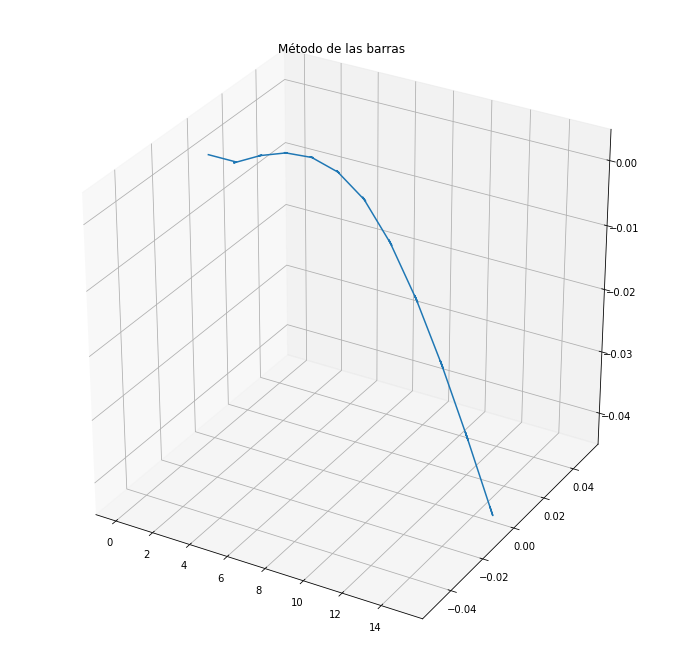

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
xs, ys, zs = [],[],[]
for i in range(0,len(r)):
  xs.append(r[i][0])
  ys.append(r[i][1])
  zs.append(r[i][2])
ax.plot(xs,ys,zs)
plt.grid(visible = True)
ax.set_title("Método de las barras")
#plt.xlim([-1,1])
plt.show()

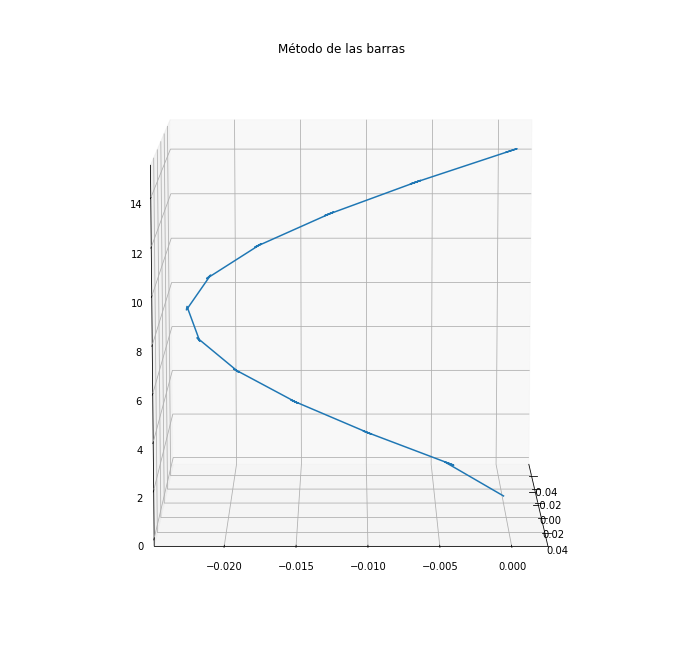

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
xs, ys, zs = [],[],[]
r = rotacion(r)
for i in range(0,len(r)):
  xs.append(r[i][0])
  ys.append(r[i][1])
  zs.append(r[i][2])
ax.plot(xs,ys,zs)
plt.grid(visible = True)
ax.set_title("Método de las barras")
ax.view_init(elev=10., azim=0)
#plt.xlim([-1,1])
plt.show()

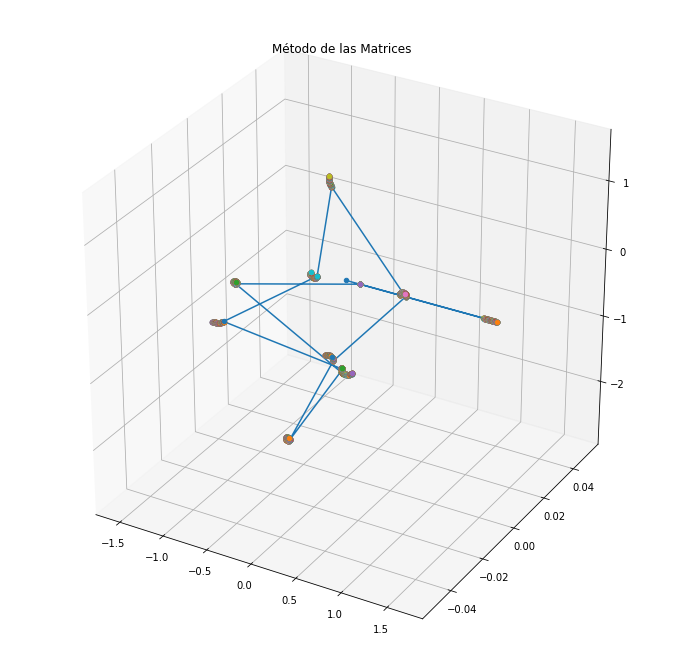

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(r)):
  ax.scatter(r[i][0], r[i][1],  r[i][2] )
ax.plot(xs,ys,zs)
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
#plt.xlim([-1,1])
plt.show()

In [ ]:
dir = np.array(posf[-1]- posf[-2])/np.linalg.norm(posf[-1]- posf[-2])
a =  np.array(posf[-3]- posf[-4])/np.linalg.norm(posf[-3]- posf[-4]  )
b = np.cross(dir, a )
#print(dir,b)
# a(x-x1)+ b(y-y1) + c(z-z1) =0 
resto = a[0]*posf[-3][0] +a[1]*posf[-3][1]+a[2]*posf[-3][2]
den = np.append(np.array([dir]),np.array([a]), axis =0)
den = np.append(den, np.array([b]), axis = 0 )
N0 = np.linalg.solve(den, np.array([ [0],[resto],[0] ]))
N0

array([[7.24509507e+07],
       [6.70516105e-10],
       [1.11779990e+06]])

In [ ]:
z = np.zeros((3,3))
z[0,:] = a
z[1,:] = np.array([1,1,1]) 
z[2,:] = np.array([1,1,1]) 
# z[0,0] = a[0]
# z[1,1] = a[1]
# z[2,2] = a[2]
b = np.array([0,0,0]) 
x = np.linalg.tensorsolve(a, b)



LinAlgError: ignored

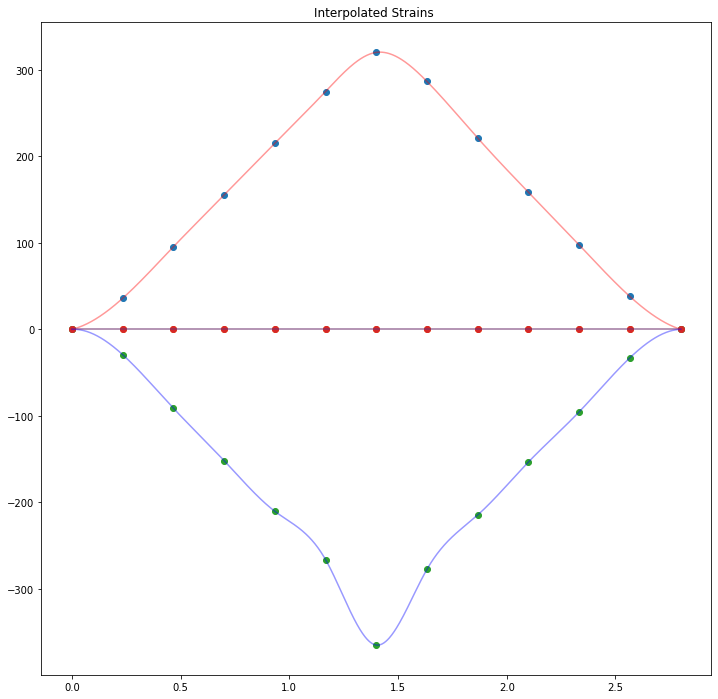

In [ ]:
import math 
k, angulos, kapp, torsion = CurvaturayA(Datos, np.linspace(0,2.8, 13), [0.0287*10**6,0.0287*10**6,0.0287*10**6,0.0287*10**6] , [0 , math.pi/2 , math.pi, 3*math.pi/2 ],10**3,2.8,23 )

In [ ]:
import math 
k, theta, kapp, tor = CurvaturayA(Datos2, np.linspace(0,2.8, 13), [0.0287*10**6,0.0287*10**6,0.0287*10**6,0.0287*10**6] , [0 , math.pi/2 , math.pi, 3*math.pi/2 ],10**3,2.8, 0)

ValueError: ignored

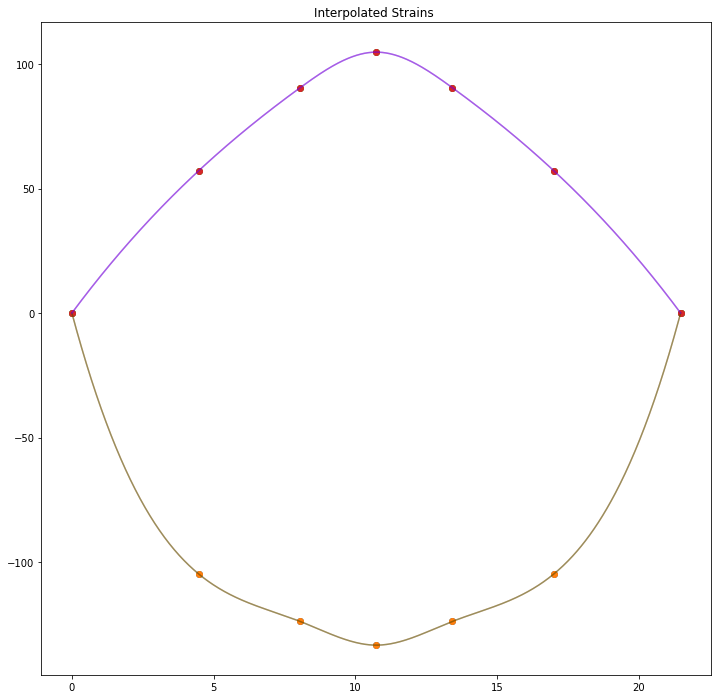

In [ ]:
import math
h = 2.323/2
k, theta, kapp, tor = CurvaturayA(Datos2, [0, 2.5*1.79 ,4.5*1.79 , 6*1.79 , 7.5*1.79, 9.5*1.79, 21.48], [np.sqrt(h**2 + 1.805**2)*10**6 , np.sqrt(h**2 + 1.805**2)*10**6, np.sqrt((2.323-h)**2 + 1.805**2)*10**6 ,np.sqrt((2.323-h)**2 + 1.805**2)*10**6], [np.arcsin(h/(np.sqrt(h**2 + 1.805**2))), math.pi - np.arcsin(h/(np.sqrt(h**2 + 1.805**2))) , math.pi + np.arcsin((2.323-h)/(np.sqrt((2.323-h)**2 + 1.805**2))), -np.arcsin((2.323-h)/(np.sqrt((2.323-h)**2 + 1.805**2)))], 10**3,21.48,3)

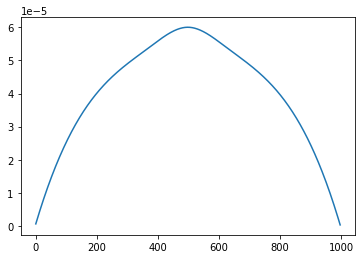

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0,len(k), len(k)),k)
plt.show()

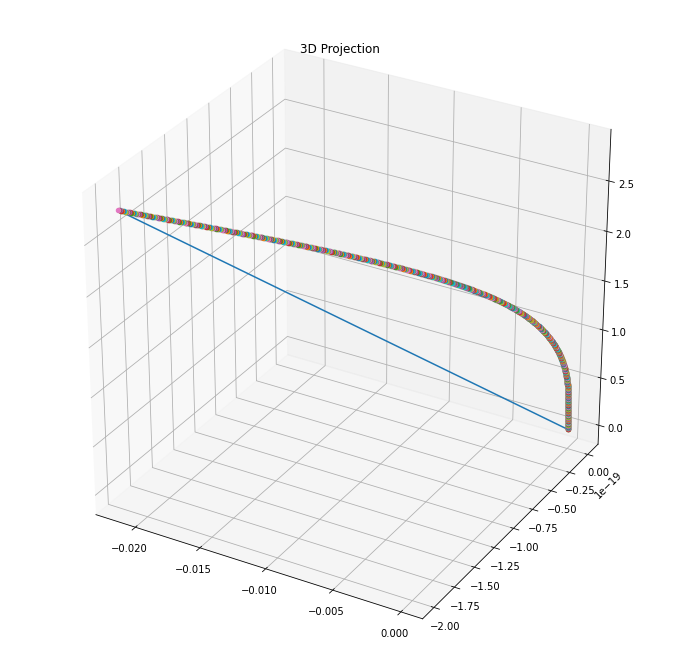

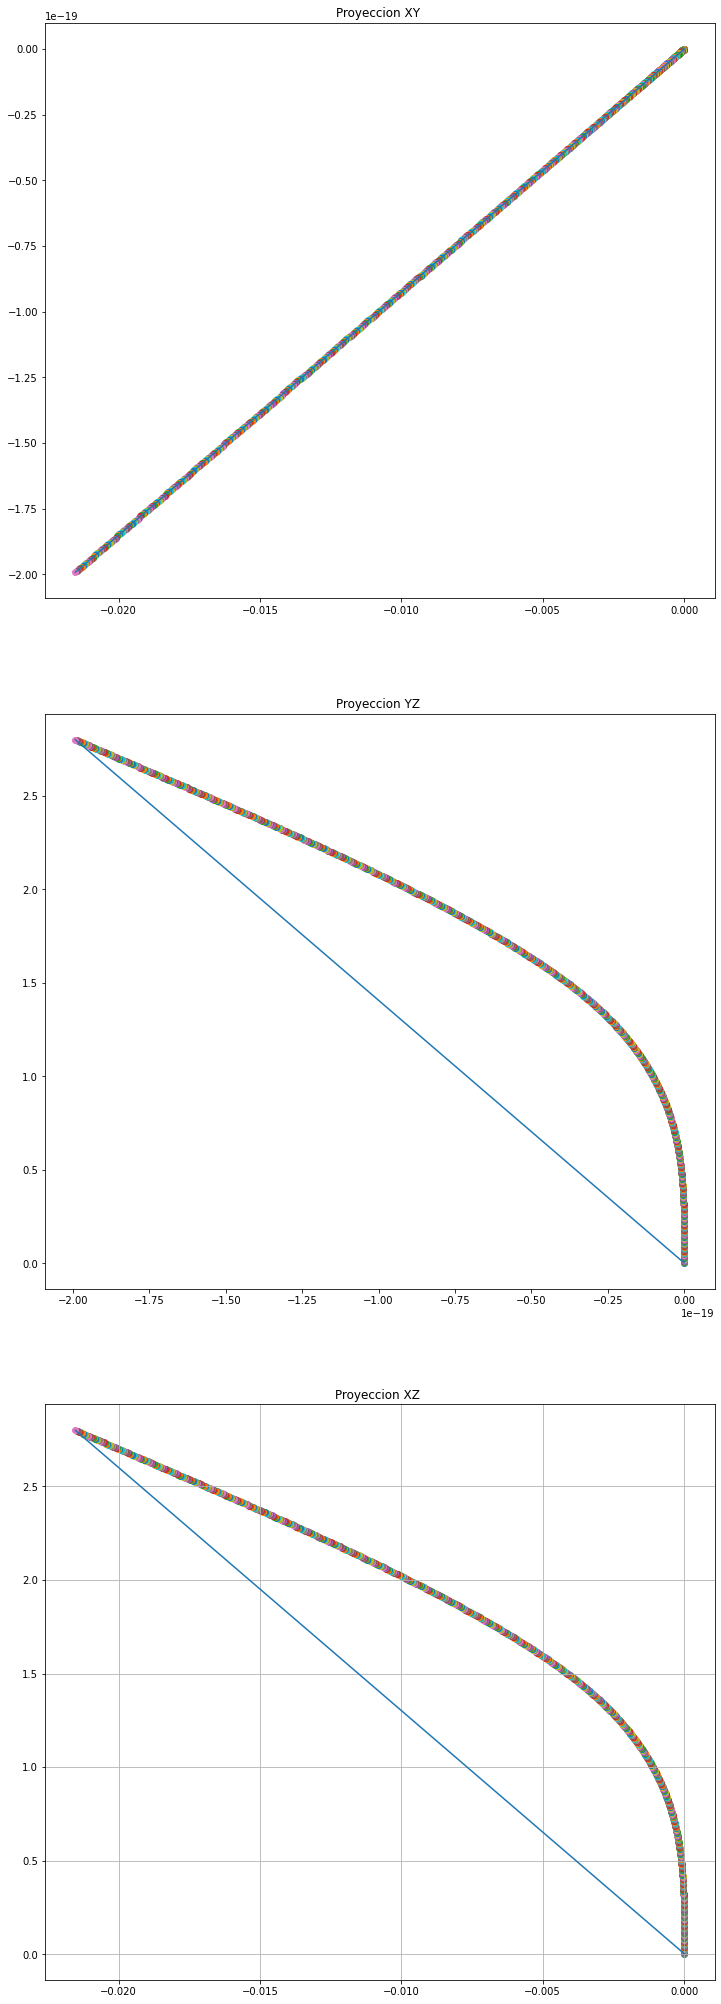

In [ ]:
posf = frenet(k, torsion, kapp[1] , 2.8, np.array([0,0,0]) )

In [ ]:
lista = [2,3,4]
for i in posf: 
  lista.append(i)
lista


[2,
 3,
 4,
 array([-4.34637366e-11, -4.02246419e-28,  2.80842528e-03]),
 array([-1.56010756e-10, -1.44384199e-27,  5.61685055e-03]),
 array([-3.65828294e-10, -3.38565279e-27,  8.42527583e-03]),
 array([-7.03653206e-10, -6.51214102e-27,  1.12337011e-02]),
 array([-1.20275389e-09, -1.11311977e-26,  1.40421264e-02]),
 array([-1.89891224e-09, -1.75739756e-26,  1.68505517e-02]),
 array([-2.83040551e-09, -2.61947216e-26,  1.96589769e-02]),
 array([-4.03798835e-09, -3.73706100e-26,  2.24674022e-02]),
 array([-5.56487461e-09, -5.15015748e-26,  2.52758275e-02]),
 array([-7.45671938e-09, -6.90101427e-26,  2.80842528e-02]),
 array([-9.76160084e-09, -9.03412657e-26,  3.08926780e-02]),
 array([-1.25300022e-08, -1.15962154e-25,  3.37011033e-02]),
 array([-1.58147937e-08, -1.46362109e-25,  3.65095286e-02]),
 array([-1.96712145e-08, -1.82052355e-25,  3.93179539e-02]),
 array([-2.41568545e-08, -2.23565873e-25,  4.21263791e-02]),
 array([-2.93316364e-08, -2.71457234e-25,  4.49348044e-02]),
 array([-3.5

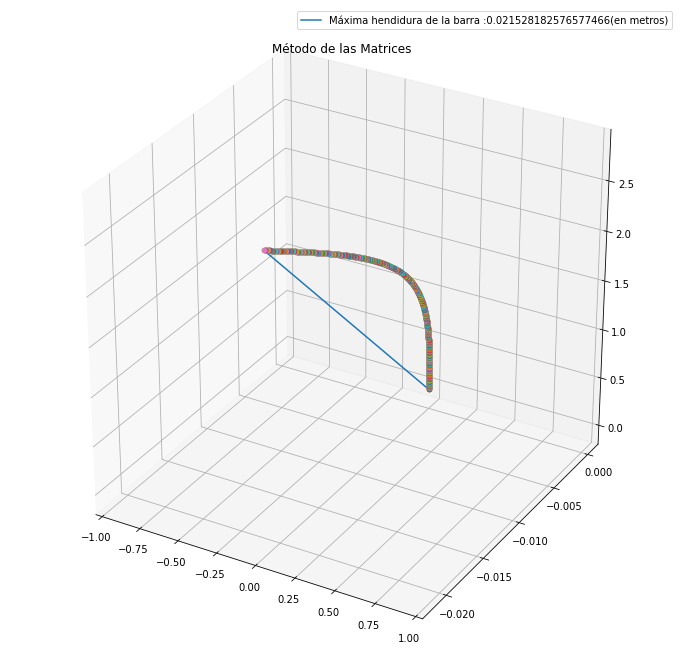

Máxima hendidura de la barra : 0.021528182576577466 (en metros)


In [ ]:
posf = rotacion(posf)
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
max_x,max_y = 0 ,0 
for i in range(0,len(posf)):
     ax.scatter(posf[i][0], posf[i][1],  posf[i][2] )
     if (abs(posf[i][0])> max_x):
       max_x = abs(posf[i][0])
     if (abs(posf[i][1])> max_y):
       max_y = abs(posf[i][1])    
distancia = np.sqrt(max_x**2 + max_y**2)
ax.plot( [ posf[0][0],posf[-1][0] ],[ posf[0][1], posf[-1][1] ] ,[ posf[0][2], posf[-1][2] ], label ="Máxima hendidura de la barra :"+str( distancia)+ "(en metros)" )
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
ax.legend()
plt.xlim([-1,1])
plt.show()

print("Máxima hendidura de la barra :", distancia, "(en metros)")

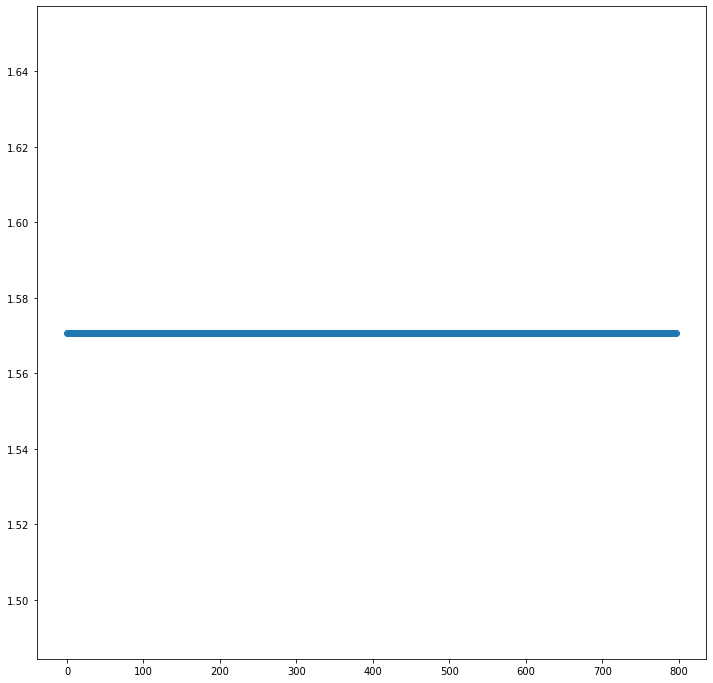

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize= (12,12))
x = np.linspace(0,len(tor),len(tor))
ax = fig.add_subplot( )
ax.scatter(x, theta)
# ax.scatter(posiciones, e_2)
# ax.scatter(posiciones, e_3)
# ax.scatter(posiciones, e_4)
# ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
# ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
# ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
# ax.set_title("Interpolated Strains ")
plt.show()

In [ ]:
suma, neutro, a, b, c, d = Metmatrices(k,angulos, 21.48, 0.05);

NameError: ignored

In [ ]:
neutro = rotacion(neutro)

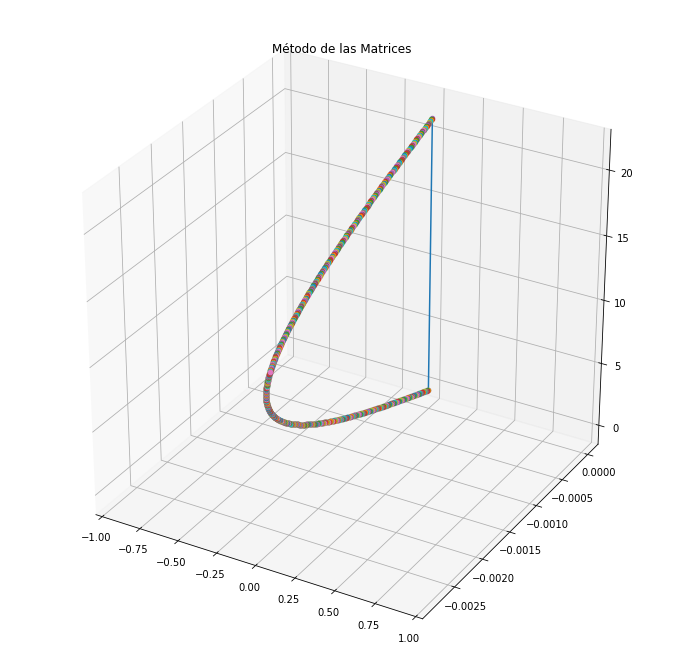

Máxima hendidura de la barra : 0.002850076698703761 (en metros)


In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
max_x,max_y = 0 ,0 
for i in range(0,len(neutro)):
     ax.scatter(neutro[i][0], neutro[i][1],  neutro[i][2] )
     if (abs(neutro[i][0])> max_x):
       max_x = abs(neutro[i][0])
     if (abs(neutro[i][1])> max_y):
       max_y = abs(neutro[i][1])
    
ax.plot( [ neutro[0][0],neutro[-1][0] ],[ neutro[0][1], neutro[-1][1] ] ,[ neutro[0][2], neutro[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.xlim([-1,1])
plt.show()
distancia = np.sqrt(max_x**2 + max_y**2)
print("Máxima hendidura de la barra :", distancia, "(en metros)")

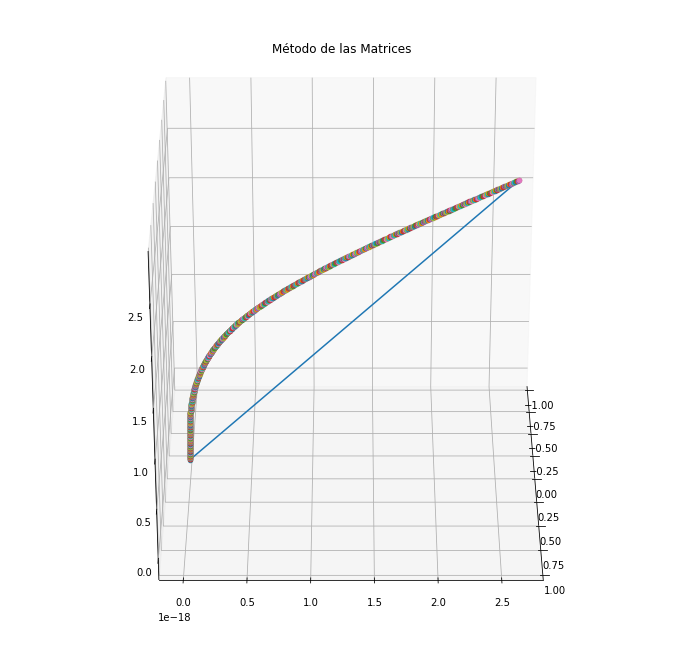

Máxima hendidura de la barra : 0.02150652045940177 (en metros)


In [ ]:
a,posf2,b,c, d, e = Metmatrices(k, angulos, 2.8, 0.05)
#posf2 = rotacion(pos)
max_x,max_y = 0 ,0 
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(posf2)):
  ax.scatter(posf2[i][0], posf2[i][1],  posf2[i][2] )
  if (abs(posf2[i][0])> max_x):
    max_x = abs(posf2[i][0])
  if (abs(posf2[i][1])> max_y):
    max_y = abs(posf2[i][1])
ax.plot( [ posf2[0][0],posf2[-1][0] ],[ posf2[0][1], posf2[-1][1] ] ,[ posf2[0][2], posf2[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
ax.view_init(azim=0)
plt.xlim([-1,1])
plt.show()
distancia = np.sqrt(max_x**2 + max_y**2)
print("Máxima hendidura de la barra :", distancia, "(en metros)")

In [ ]:
posf2 = rotacion(pos)
max_x,max_y = 0 ,0 
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(posf2)):
  ax.scatter(posf2[i][0], posf2[i][1],  posf2[i][2] )
  if (abs(posf2[i][0])> max_x):
    max_x = abs(posf2[i][0])
  if (abs(posf2[i][1])> max_y):
    max_y = abs(posf2[i][1])
ax.plot( [ posf2[0][0],posf2[-1][0] ],[ posf2[0][1], posf2[-1][1] ] ,[ posf2[0][2], posf2[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.xlim([-1,1])
plt.show()
distancia = np.sqrt(max_x**2 + max_y**2)
print("Máxima hendidura de la barra :", distancia, "(en metros)")

In [ ]:
mattor, p0, f1,f2,f3,f4 = Metmatrices(k, theta , 2.8, 0.0287 ) # falla en el 256 

255 [[ 6.12322481e-17 -1.00000000e+00  1.06049396e-19  2.24532678e-20]
 [ 9.99998503e-01  6.12323400e-17  1.73035884e-03  3.65591247e-04]
 [-1.73035884e-03  9.54760147e-23  9.99998503e-01  7.18956683e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 0.0 180.80858995484547
256 [[ 6.12322465e-17 -1.00000000e+00  1.07004924e-19  2.27524414e-20]
 [ 9.99998476e-01  6.12323400e-17  1.74596378e-03  3.70472743e-04]
 [-1.74596378e-03  9.54760147e-23  9.99998476e-01  7.21765104e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 0.0 179.96994856074838
257 [[ 6.12322448e-17 -1.00000000e+00  1.07964886e-19  2.30543047e-20]
 [ 9.99998448e-01  6.12323400e-17  1.76164116e-03  3.75398167e-04]
 [-1.76164116e-03  9.54760147e-23  9.99998448e-01  7.24573525e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 0.0 179.13837125024043


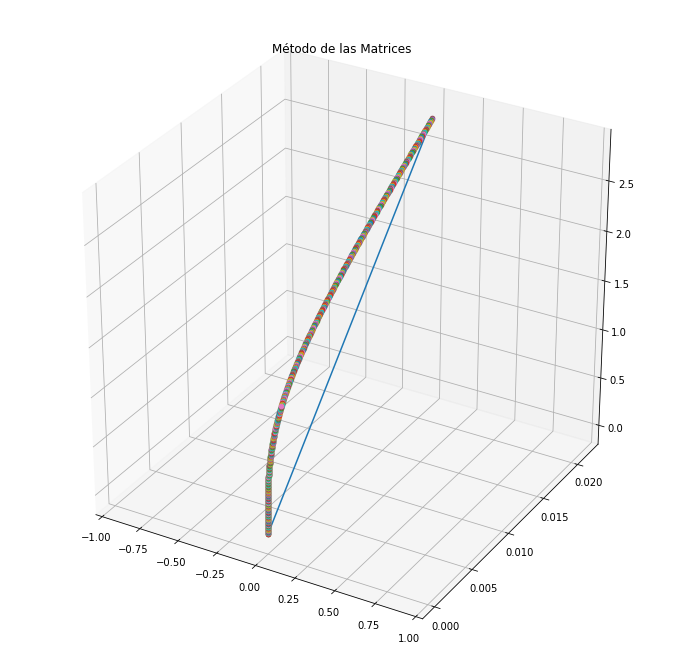

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(mattor)):
     ax.scatter(mattor[i][0], mattor[i][1],  mattor[i][2] )
    
ax.plot( [ mattor[0][0],mattor[-1][0] ],[ mattor[0][1], mattor[-1][1] ] ,[ mattor[0][2], mattor[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.xlim([-1,1])
plt.show()

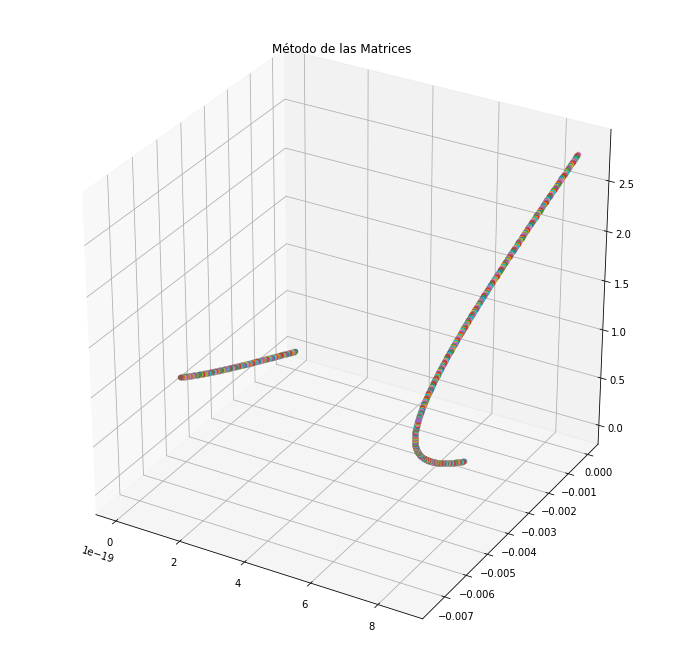

Máxima hendidura de la barra : 0.007458118525223611 (en metros)


In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
max_x, max_y = 0,0 
omeg =  np.arcsin(mattor[-1][1]/np.sqrt(mattor[-1][1]**2 + mattor[-1][2]**2) )
for i in range(0,len(mattor)):
  mat = rotx(omeg)@mattor[i]
  ax.scatter(mat[0], mat[1],  mat[2] )
  if (abs(mat[0])> max_x):
    max_x = abs(mat[0])
  if (abs(mat[1])> max_y):
    max_y = abs(mat[1])
    
#ax.plot( [ mattor[0][0],mattor[-1][0] ],[ mattor[0][1], mattor[-1][1] ] ,[ mattor[0][2], mattor[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.show()

distancia = np.sqrt(max_x**2 + max_y**2)
print("Máxima hendidura de la barra :", distancia, "(en metros)")


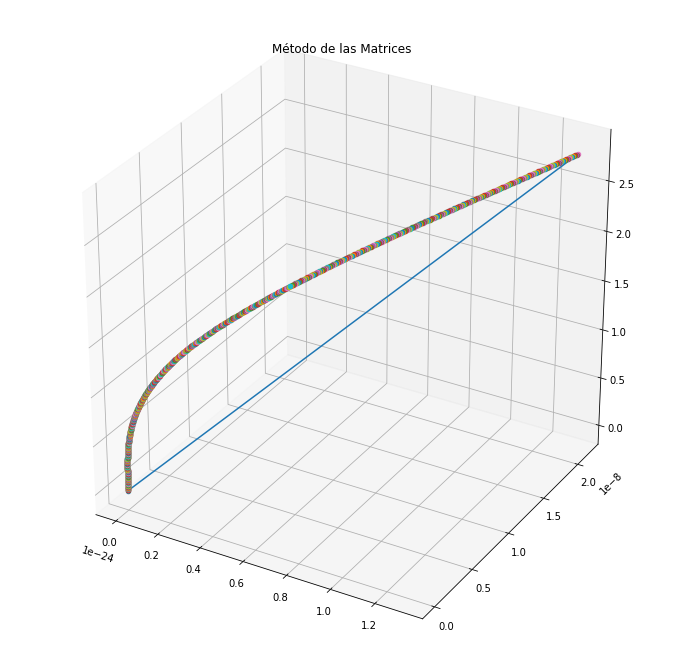

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
posf = rotacion(p0)
ax = fig.add_subplot( projection='3d')
for i in range(0,len(p0)):
     ax.scatter(p0[i][0], p0[i][1],  p0[i][2] )
    
ax.plot( [ p0[0][0],p0[-1][0] ],[ p0[0][1], p0[-1][1] ] ,[ p0[0][2], p0[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.show()

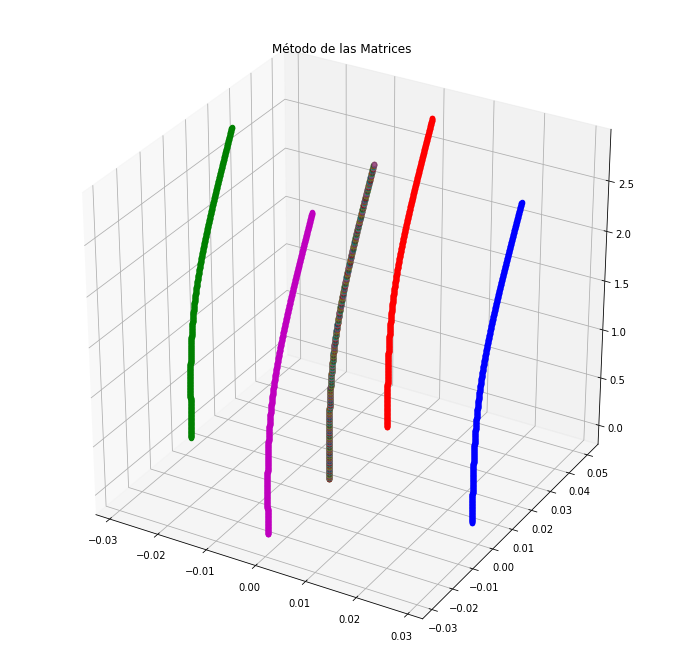

In [ ]:
import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(f1)):
    # ax.scatter(mattor[i][0], mattor[i][1],  mattor[i][2] )
    ax.scatter(p0[i][0], p0[i][1],  p0[i][2]  ) 
    ax.scatter(mattor[i][0] , mattor[i][1], mattor[i][2], c = "black", alpha = 0.3)
    ax.scatter(f1[i][0], f1[i][1],  f1[i][2] , c = "r" )
    ax.scatter(f2[i][0], f2[i][1],  f2[i][2] , c = "g")
    ax.scatter(f3[i][0], f3[i][1], f3[i][2] , c = "m" )
    ax.scatter(f4[i][0], f4[i][1], f4[i][2] , c = "blue" )
    
# ax.plot( [ mattor[0][0],mattor[-1][0] ],[ mattor[0][1], mattor[-1][1] ] ,[ mattor[0][2], mattor[-1][2] ])
plt.grid(visible = True)
ax.set_title("Método de las Matrices")
plt.show()

In [ ]:
pos1, posf = [],[]
alpham =  np.arcsin(mattor[0][-1][0]/np.sqrt(mattor[0][-1][0]**2 + mattor[0][-1][1]**2) )
betam = np.arcsin(mattor[0][-1][1]/np.sqrt(mattor[0][-1][1]**2 + mattor[0][-1][2]**2) )

for i in range(0,len(mattor[0])):
  vect = np.array([ mattor[0][i][0], mattor[0][i][1], mattor[0][i][2]] )
  m = rotz(alpham)@vect
  pos1.append(m)

for j in range(0,len(mattor[0])): 
  m2 = rotx(betam)@pos1[j]
  posf.append(m2)

[array([0.00000000e+00, 1.88421233e-06, 2.79999937e-03]),
 array([-1.05967731e-10,  3.76843749e-06,  5.59999873e-03]),
 array([-4.23873631e-10,  5.65268828e-06,  8.39999810e-03]),
 array([-1.05969288e-09,  7.53697747e-06,  1.11999975e-02]),
 array([-2.11940738e-09,  9.42131777e-06,  1.39999968e-02]),
 array([-3.70900782e-09,  1.13057218e-05,  1.67999962e-02]),
 array([-5.93449558e-09,  1.31902022e-05,  1.95999956e-02]),
 array([-8.90188474e-09,  1.50747712e-05,  2.23999949e-02]),
 array([-1.27172040e-08,  1.69594414e-05,  2.51999943e-02]),
 array([-1.74864985e-08,  1.88442248e-05,  2.79999937e-02]),
 array([-2.33158318e-08,  2.07291334e-05,  3.07999930e-02]),
 array([-3.03112877e-08,  2.26141791e-05,  3.35999924e-02]),
 array([-3.85789717e-08,  2.44993736e-05,  3.63999918e-02]),
 array([-4.82250133e-08,  2.63847283e-05,  3.91999911e-02]),
 array([-5.93555671e-08,  2.82702544e-05,  4.19999905e-02]),
 array([-7.20768146e-08,  3.01559630e-05,  4.47999899e-02]),
 array([-8.64949660e-08,  3

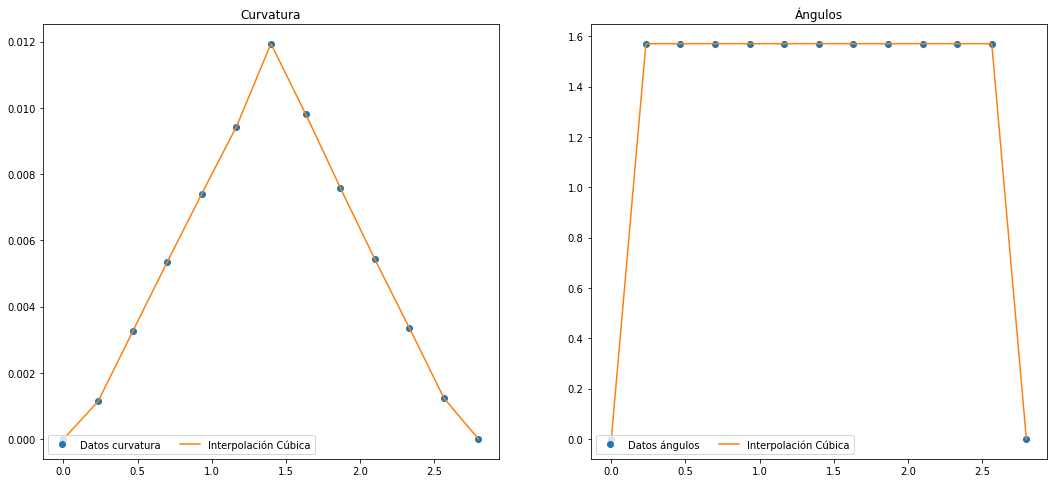

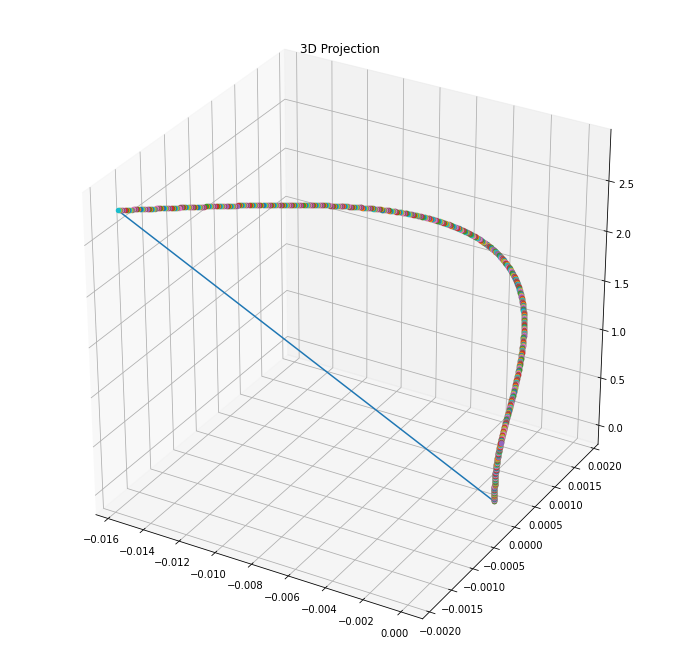

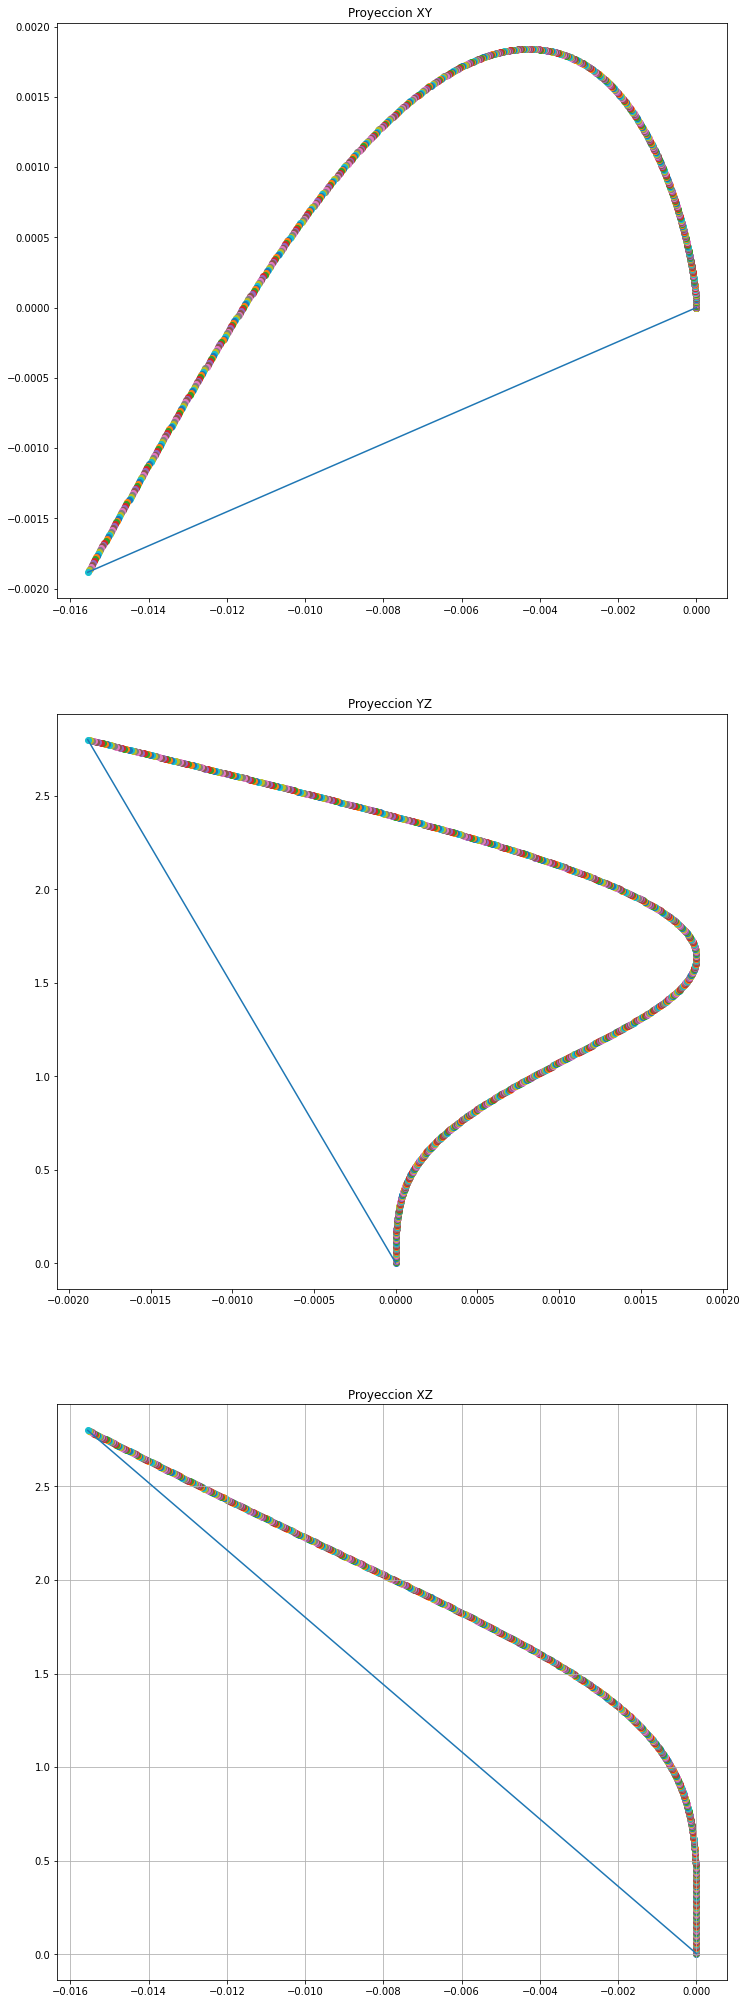

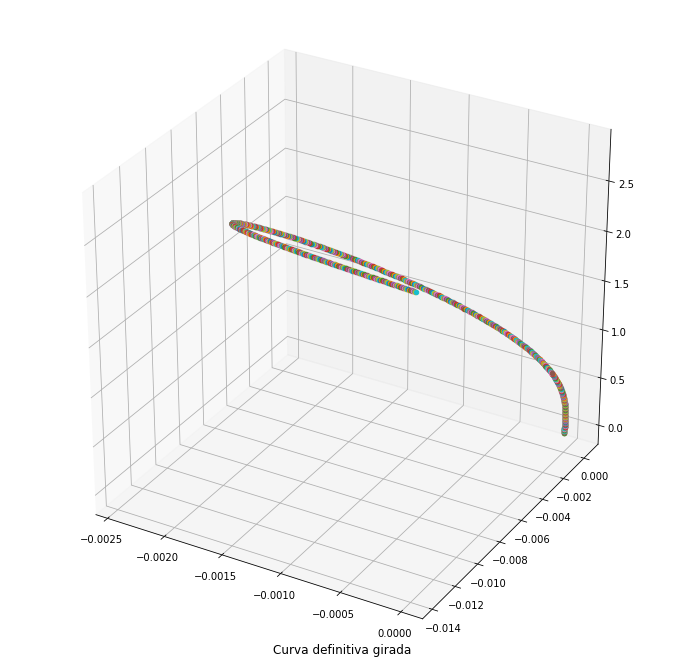

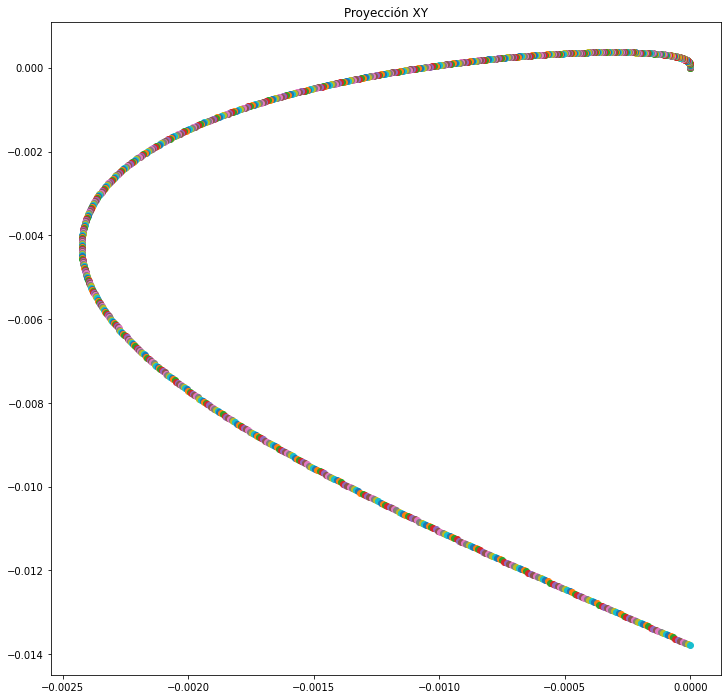

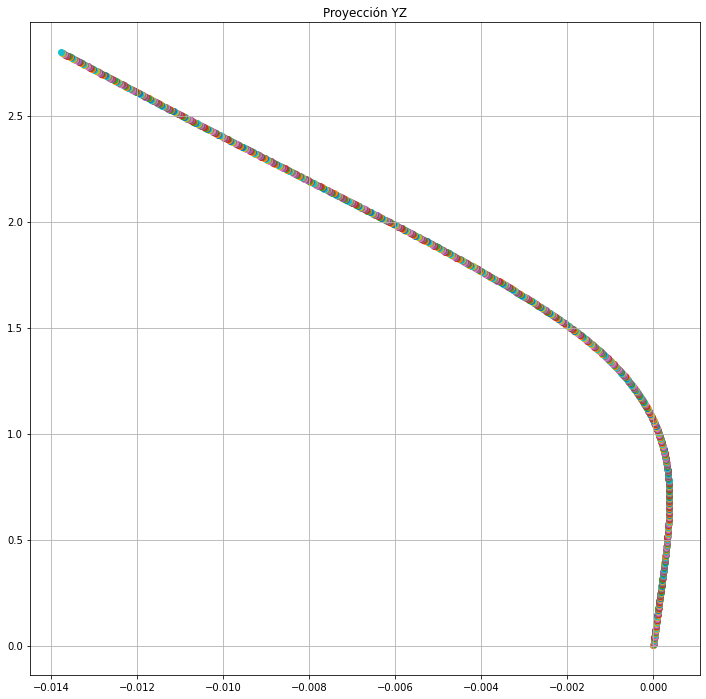

In [ ]:
TODOF(Datos, np.linspace(0,2.8, 13), [0.0287*10**6,0.0287*10**6,0.0287*10**6,0.0287*10**6] , [0 , math.pi/2 , math.pi, 3*math.pi/2 ],10**3,2.8 )

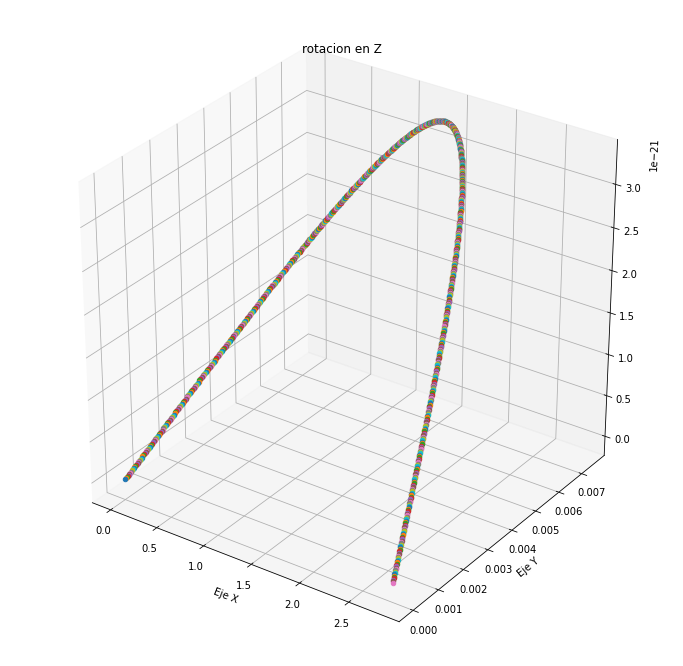

Máxima hendidura de la barra : 0.0074582116809084 (en metros)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
max_x, max_y = 0,0
for i in range(0,len(posrot)):
  ax.scatter(posrot[i][2], -posrot[i][1]  ,posrot[i][0])
  # ax.scatter(0 , posrot[i][1], posrot[i][2], c = "r")
  # ax.scatter(posrot[i][0], 0, posrot[i][2], c = "r")
  if (abs(posrot[i][0])> max_x):
    max_x = abs(posrot[i][0])
  if (abs(posrot[i][1])> max_y):
    max_y = abs(posrot[i][1])
plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.azim = -55
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
# plt.xlim([-1.5,1.5])
# plt.ylim([-1.5,1.5])
# for ii in range(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         savefig("movie%d.png" % ii)
plt.show()
distancia = np.sqrt(max_x**2 + max_y**2)
print("Máxima hendidura de la barra :", distancia, "(en metros)")


## Cálculo de Errores
https://math.stackexchange.com/questions/1065355/natural-cubic-spline-interpolation-error-estimate

In [ ]:
Error_lamba = 0.01 # nm
Error_strain = 